## Poin Assignment :
**1.** Plot barplot pada city, masih kurang informatif. Pertanyaan :
1. Bagaimana caranya supaya Barplot memiliki tampilan informatif ?
2. Tulis insightnya ya !

`clue` nomer 1 : coba pahami tentang `value_counts`, ambil 10 atau 5 nilai teratas saja. kemudian buat barplot dan tulis insightnya (30 poin)

**2.** Lakukan eksplorasi dan mencoba looping pada kolom dan baris dataframe `dataset_day6.csv`
- for loop (15 poin)
- while loop (15 poin)
- nested loop (10 poin)

`clue` nomer 2 :
- pahamilah definisi dataframe pada `slide 4 PPT Data Type and Structure Part 2`
- anggap dataframe memiliki `index` yang bisa kita looping serta `kolom` yang bisa kita akses sebagai `dictionary` maupun `list` atau `array`
- pahami tentang `iterrows` dan `enumerate` pada dokumentasi ini :
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html
- https://www.geeksforgeeks.org/enumerate-in-python/

**3** Lakukan manipulasi yang menghasilkan insight apapun untuk memproses dataframe menggunakan `lambda function` pada :
1. kolom numerikal (1 kolom) dan (12)
2. kolom kategorikal (1 kolom) (13)
3. Tulis insightnya (5)

### Note : soal 1,2,3 menggunakan file dataset_day6.csv yg digunakan dikelas

In [ ]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('dataset_day6.csv')

In [ ]:
data.head()

,Age,Salary,Height,Gender,Marital Status,Education Level,Job Satisfaction,City,Province
0,47.457284,25867.758709,40.880220,Female,Married,Bachelor's,Low,Malang,Jawa Timur
1,39.202564,31171.212403,42.934217,Female,Single,Bachelor's,Low,Pontianak,Kalimantan Barat
2,49.419951,26938.438051,76.937048,Female,Divorced,Bachelor's,High,Depok,Jawa Barat
3,60.799388,38376.824337,33.346494,Female,Divorced,PhD,High,Bogor,Jawa Barat
4,37.956006,66077.876060,89.834535,Male,Divorced,Master's,High,Pontianak,Kalimantan Barat


In [ ]:
data['Province'].value_counts()

,count
Province,
Jawa Barat,2018
Jawa Timur,1024
Kalimantan Timur,1000
Aceh,546
DKI Jakarta,535
Sumatera Selatan,509
Bali,506
Sulawesi Selatan,505
Jawa Tengah,500


## No 1

In [ ]:
# Mengecek 10 kota dengan jumlah penduduk terbanyak
top_cities = data['City'].value_counts().head(10)
top_cities

,count
City,
Banda Aceh,546
Malang,539
Jakarta,535
Bekasi,518
Balikpapan,514
Palembang,509
Depok,509
Denpasar,506
Bandung,505


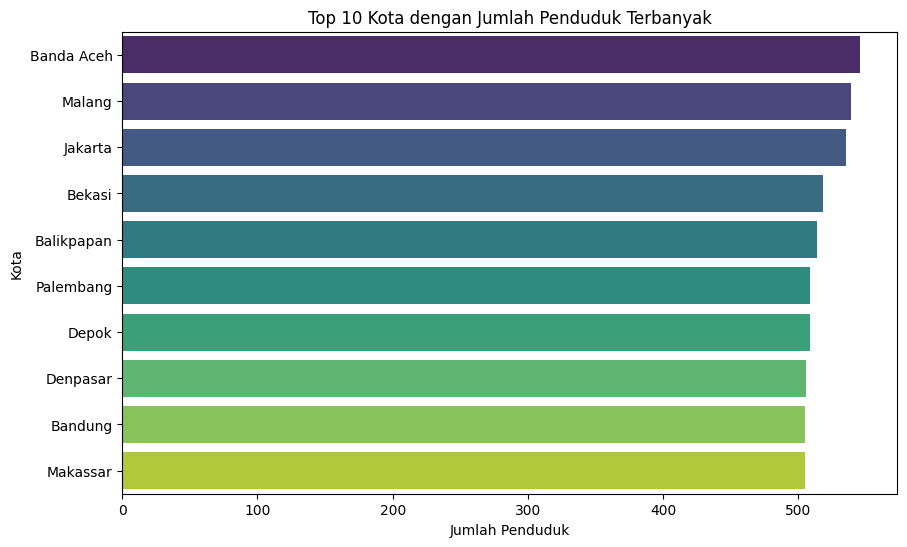

In [ ]:
# Membuat barplot untuk 10 kota teratas
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette='viridis', legend=False)
plt.title('Top 10 Kota dengan Jumlah Penduduk Terbanyak')
plt.xlabel('Jumlah Penduduk')
plt.ylabel('Kota')
plt.show()

**Insight :**
* Banda Aceh menjadi kota dengan jumlah penduduk terbanyak, dengan total 546 orang.
* Malang dan Jakarta juga merupakan kota dengan representasi yang tinggi, dengan masing-masing jumlah penduduk sebanyak 539 dan 535 orang.
* Kota-kota lain dalam 10 besar, seperti Bekasi, Balikpapan, Palembang, Depok, Denpasar, Bandung, dan Makassar juga memiliki jumlah penduduk yang cukup besar, berkisar antara 505 hingga 518 orang.
* Jika data ini akan kita gunakan untuk analisis pemasaran, maka kota-kota dengan jumlah penduduk terbanyak dapat diidentifikasi sebagai target pasar utama. Misalnya, Banda Aceh dan Malang bisa menjadi fokus utama untuk kampanye pemasaran produk atau jasa tertentu.

Selain jumlah penduduk kita juga bisa melakukan analisis lainya seperti:

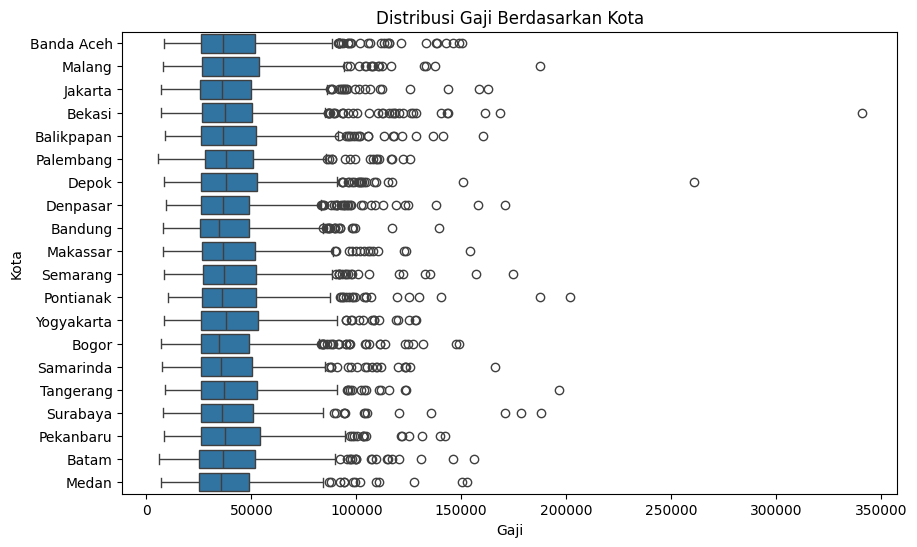

In [ ]:
# Distribusi Gaji Berdasarkan Kota
plt.figure(figsize=(10, 6))
sns.boxplot(x='Salary', y='City', data=data, order=data['City'].value_counts().index)
plt.title('Distribusi Gaji Berdasarkan Kota')
plt.xlabel('Gaji')
plt.ylabel('Kota')
plt.show()

* Boxplot ini menunjukkan distribusi gaji di berbagai kota dengan indikator median, kuartil atas, dan bawah. Dari sini, kita dapat melihat variasi gaji antar kota, mengidentifikasi kota dengan median gaji lebih tinggi atau lebih rendah.

<Figure size 1000x600 with 0 Axes>

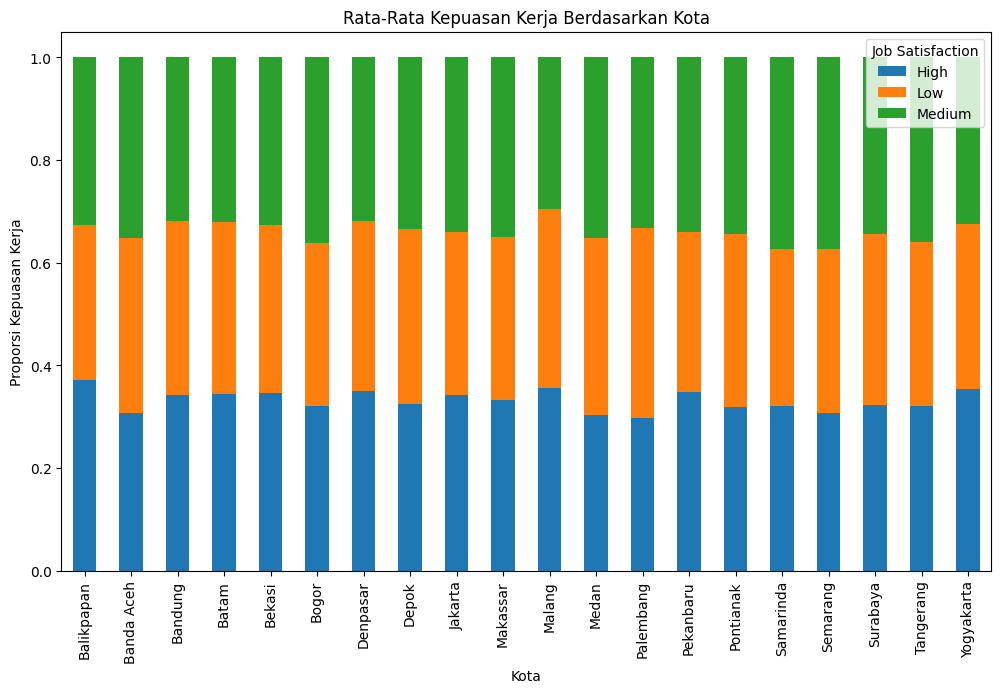

In [ ]:
# Rata-Rata Kepuasan Kerja Berdasarkan Kota
plt.figure(figsize=(10, 6))
avg_job_satisfaction = data.groupby('City')['Job Satisfaction'].value_counts(normalize=True).unstack().fillna(0)
avg_job_satisfaction.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Rata-Rata Kepuasan Kerja Berdasarkan Kota')
plt.ylabel('Proporsi Kepuasan Kerja')
plt.xlabel('Kota')
plt.show()

* Stacked Bar Chart ini menunjukkan distribusi kepuasan kerja (rendah, sedang, tinggi) di setiap kota. Dengan chart ini, kita dapat melihat bagaimana tingkat kepuasan kerja bervariasi di berbagai kota, memungkinkan identifikasi kota dengan kepuasan kerja tertinggi atau terendah

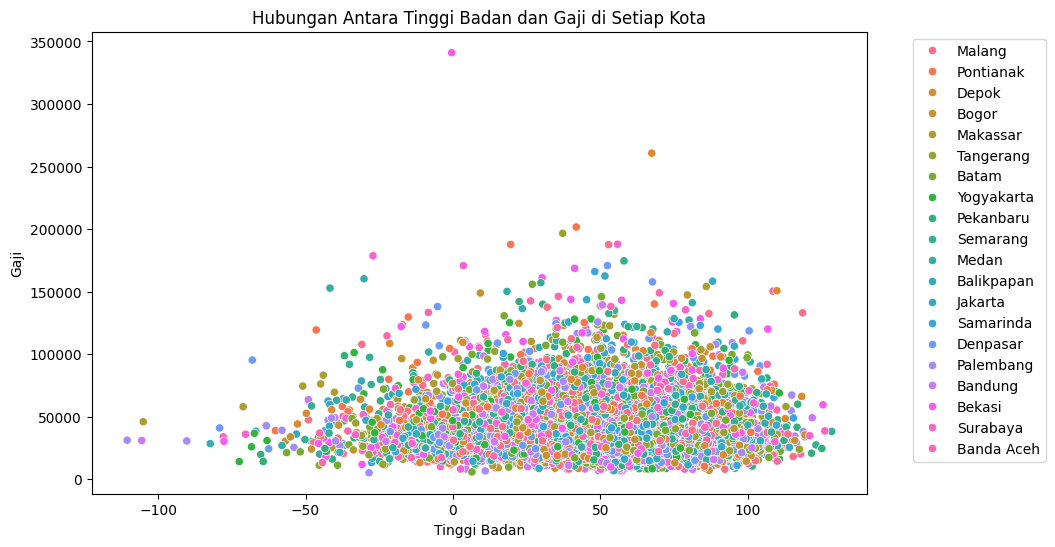

In [ ]:
# 4. Hubungan Antara Tinggi Badan dan Gaji di Setiap Kota
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Salary', hue='City', data=data)
plt.title('Hubungan Antara Tinggi Badan dan Gaji di Setiap Kota')
plt.xlabel('Tinggi Badan')
plt.ylabel('Gaji')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* Scatter plot ini menunjukkan hubungan antara tinggi badan dan gaji, dibedakan berdasarkan kota. Kita dapat melihat apakah ada korelasi atau pola tertentu yang muncul antara tinggi badan dan gaji dalam konteks masing-masing kota.

<Figure size 1200x800 with 0 Axes>

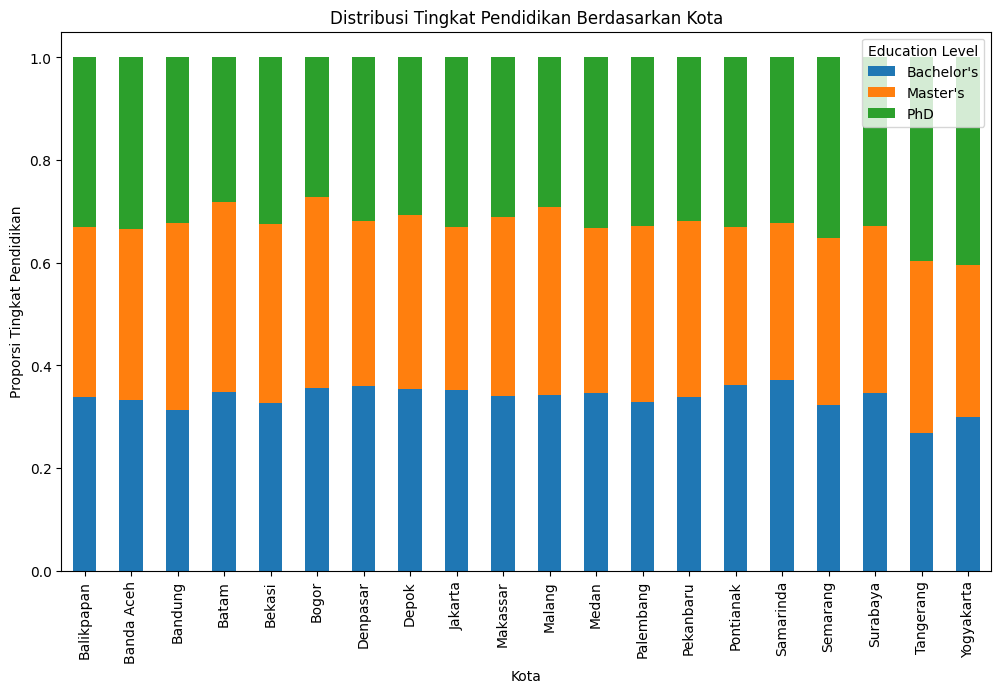

In [ ]:

# 5. Distribusi Tingkat Pendidikan Berdasarkan Kota
plt.figure(figsize=(12, 8))
education_distribution = data.groupby('City')['Education Level'].value_counts(normalize=True).unstack().fillna(0)
education_distribution.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribusi Tingkat Pendidikan Berdasarkan Kota')
plt.ylabel('Proporsi Tingkat Pendidikan')
plt.xlabel('Kota')
plt.show()

* Stacked Bar Chart ini menunjukkan distribusi tingkat pendidikan di setiap kota. Visualisasi ini dapat membantu mengidentifikasi kota dengan proporsi pendidikan tinggi yang lebih tinggi atau lebih rendah, yang bisa berhubungan dengan peluang ekonomi dan gaji.

## No 2
* For Loop

In [ ]:
# 1. Menggunakan for loop untuk iterasi pada setiap kolom dan mencetak nama kolom
for column in data.columns:
    print(f"Nama kolom: {column}")

Nama kolom: Age
Nama kolom: Salary
Nama kolom: Height
Nama kolom: Gender
Nama kolom: Marital Status
Nama kolom: Education Level
Nama kolom: Job Satisfaction
Nama kolom: City
Nama kolom: Province


In [ ]:
# 2. Menggunakan for loop untuk menghitung jumlah nilai unik pada setiap kolom
unique_values = {}
for column in data.columns:
    unique_values[column] = data[column].nunique()
unique_values


{'Age': 10000,
 'Salary': 10000,
 'Height': 10000,
 'Gender': 2,
 'Marital Status': 3,
 'Education Level': 3,
 'Job Satisfaction': 3,
 'City': 20,
 'Province': 15}

In [ ]:
# 3. Menggunakan for loop untuk mencetak 5 nilai pertama dari setiap kolom
first_five_values = {}
for column in data.columns:
    first_five_values[column] = data[column].head(5).tolist()
    print(f"5 nilai pertama dari kolom '{column}': {first_five_values[column]}")
# first_ffive_values = first_five_values

5 nilai pertama dari kolom 'Age': [47.45728398914603, 39.2025640847746, 49.419950995309, 60.79938813330433, 37.95600612859664]
5 nilai pertama dari kolom 'Salary': [25867.75870933382, 31171.212402915, 26938.4380509639, 38376.82433650701, 66077.87606011976]
5 nilai pertama dari kolom 'Height': [40.88022038301296, 42.93421685631418, 76.93704781345117, 33.34649371394147, 89.83453477569017]
5 nilai pertama dari kolom 'Gender': ['Female', 'Female', 'Female', 'Female', 'Male']
5 nilai pertama dari kolom 'Marital Status': ['Married', 'Single', 'Divorced', 'Divorced', 'Divorced']
5 nilai pertama dari kolom 'Education Level': ["Bachelor's", "Bachelor's", "Bachelor's", 'PhD', "Master's"]
5 nilai pertama dari kolom 'Job Satisfaction': ['Low', 'Low', 'High', 'High', 'High']
5 nilai pertama dari kolom 'City': ['Malang', 'Pontianak', 'Depok', 'Bogor', 'Pontianak']
5 nilai pertama dari kolom 'Province': ['Jawa Timur', 'Kalimantan Barat', 'Jawa Barat', 'Jawa Barat', 'Kalimantan Barat']


* While Loop

In [ ]:
# 1. Menggunakan while loop untuk mencetak nilai pada kolom tertentu (misal 'City') sampai kita mencapai nilai tertentu
i = 0
while i < len(data) and data['City'].iloc[i] != 'Jakarta':
    print(data['City'].iloc[i])
    i += 1

Malang
Pontianak
Depok
Bogor
Pontianak
Makassar
Tangerang
Batam
Batam
Yogyakarta
Depok
Pekanbaru
Semarang
Malang
Bogor
Pontianak
Medan
Medan
Yogyakarta
Depok
Balikpapan
Medan


In [ ]:
# 2. Menggunakan while loop untuk menghitung berapa banyak baris yang memiliki 'Salary' di atas 50000
count = 0
index = 0
while index < len(data):
    if data['Salary'].iloc[index] > 50000:
        count += 1
    index += 1
count

2657

In [ ]:
# 3. Menggunakan while loop untuk menambahkan nilai pada kolom 'Age' sampai nilai tersebut melebihi 100
age_sum = 0
index = 0
while age_sum <= 100 and index < len(data):
    age_sum += data['Age'].iloc[index]
    index += 1
age_sum, index

(136.07979906922964, 3)

* Nested Loop

In [ ]:
# 1. Menggunakan nested loop untuk iterasi pada setiap kolom dan setiap baris, dan mencetak nilai-nilai tersebut (batas 3 kolom dan 3 baris pertama)
for column in data.columns[:3]:
    for index in range(3):
        print(f"Kolom: {column}, Baris: {index}, Nilai: {data[column].iloc[index]}")

Kolom: Age, Baris: 0, Nilai: 47.45728398914603
Kolom: Age, Baris: 1, Nilai: 39.2025640847746
Kolom: Age, Baris: 2, Nilai: 49.419950995309
Kolom: Salary, Baris: 0, Nilai: 25867.75870933382
Kolom: Salary, Baris: 1, Nilai: 31171.212402915
Kolom: Salary, Baris: 2, Nilai: 26938.4380509639
Kolom: Height, Baris: 0, Nilai: 40.88022038301296
Kolom: Height, Baris: 1, Nilai: 42.93421685631418
Kolom: Height, Baris: 2, Nilai: 76.93704781345117


In [ ]:
# 2. Menggunakan nested loop untuk mencari nilai yang muncul lebih dari satu kali dalam baris dan mencetaknya (batas 5 baris pertama)
for index in range(5):
    unique_values = set()
    duplicates = []
    for value in data.iloc[index]:
        if value in unique_values:
            duplicates.append(value)
        else:
            unique_values.add(value)
    print(f"Baris {index}: Duplikat {duplicates}")

Baris 0: Duplikat []
Baris 1: Duplikat []
Baris 2: Duplikat []
Baris 3: Duplikat []
Baris 4: Duplikat []


## No 3
**Lambda Function Pada Kolom Numerikal**

In [ ]:
# Membuat lambda function untuk mengkategorikan generasi berdasarkan umur dengan patokan tahun 2024
# Menghitung tahun lahir dari kolom 'Age'
data['Birth Year'] = 2024 - data['Age']

# Mengkategorikan tahun lahir menjadi generasi
data['Generation'] = data['Birth Year'].apply(
    lambda x: 'The Builders' if x < 1946 else
              'Baby Boomers' if 1946 <= x <= 1964 else
              'Gen X' if 1965 <= x <= 1979 else
              'Gen Y' if 1980 <= x <= 1994 else
              'Gen Z' if 1995 <= x <= 2009 else
              'Gen Alpha' if 2010 <= x <= 2024 else
              'Gen Beta' if 2025 <= x <= 2039 else
              'Unknown'
)
# Menampilkan hasil
data[['Age', 'Birth Year', 'Generation']].head()


,Age,Birth Year,Generation
0,47.457284,1976.542716,Gen X
1,39.202564,1984.797436,Gen Y
2,49.419951,1974.580049,Gen X
3,60.799388,1963.200612,Baby Boomers
4,37.956006,1986.043994,Gen Y


In [ ]:
# Menghitung kembali jumlah individu di setiap generasi
generation_counts = data['Generation'].value_counts()

generation_counts

,count
Generation,
Gen Y,3929
Gen X,2946
Gen Z,1561
Baby Boomers,704
Unknown,648
Gen Alpha,181
The Builders,25
Gen Beta,6


Ternyata kolom "Unknown"  memiliki nilai sebanyak 648, Kategori "Unknown" muncul karena ada individu dalam dataset yang memiliki nilai Age yang menghasilkan tahun lahir di luar rentang tahun yang telah di definisikan untuk generasi-generasi yang ada.
Penyebabnya mungkin ada individu yang memiliki usia yang sangat tinggi atau sangat rendah, yang tidak sesuai dengan rentang tahun kelahiran yang didefinisikan. Hal ini bisa terjadi karena ada data yang salah input, sehingga hasil perhitungan tahun lahir berada di luar batas tahun yang di gunakan.
Adapun untuk mengatasi hal ini kita dapat mencari permasalahannya terlebih dahulu

In [ ]:
# Menghitung rentang usia untuk individu yang masuk dalam kategori "Unknown"
unknown_ages = data[data['Generation'] == 'Unknown']['Age']

age_range_unknown = (unknown_ages.min(), unknown_ages.max())

age_range_unknown

(-0.8732126278142758, 59.92569018790796)

Rentang usia untuk kategori "Unknown" adalah dari sekitar -0.8 tahun hingga 59.99 tahun. Usia negatif ini menunjukkan bahwa ada data yang tidak valid, seperti usia yang dihitung berdasarkan tahun kelahiran yang belum terjadi (lahir di masa depan), atau bisa jadi hasil dari kesalahan input atau perhitungan.
Untuk usia yang mendekati 59 tahun, meskipun ini mungkin valid, jika individu tersebut lahir pada tahun 1964 atau setelahnya, mereka seharusnya masuk dalam kategori "Baby Boomers" atau "Generasi X". Oleh karena itu, perlu peninjauan lebih lanjut terhadap data ini untuk memastikan keakuratannya.

In [ ]:
# Mengambil nilai unik dari kolom 'Age'
unique_ages = data['Age'].unique()

# Mengurutkan nilai unik
unique_ages.sort()
unique_ages


array([-9.99120327, -8.87652213, -6.94874879, ..., 86.87771744,
       91.08550938, 92.04109018])

In [ ]:
# Menghapus baris dengan usia negatif
data_cleaned = data[data['Age'] >= 0]

# Menetapkan batas maksimum usia (misalnya 120 tahun)
data_cleaned = data_cleaned[data_cleaned['Age'] <= 120]

# Menghitung kembali jumlah individu di setiap generasi setelah pembersihan
cleaned_generation_counts = data_cleaned['Generation'].value_counts()

cleaned_generation_counts

,count
Generation,
Gen Y,3929
Gen X,2946
Gen Z,1561
Baby Boomers,704
Unknown,645
Gen Alpha,181
The Builders,25


**Insight :**
*  Generasi Y (Lahir 1980-1994) dan Generasi X (Lahir 1965-1979) mendominasi dataset dengan jumlah individu yang paling banyak, yaitu masing-masing 3,929 dan 2,946 orang. Sehingga jika data ini berkaitan dengan angkatan kerja, pemasaran, atau demografi pengguna, fokus pada Generasi Y dan X bisa menjadi prioritas, karena mereka membentuk mayoritas populasi
* Generasi Z (Lahir 1995-2009) dan Baby Boomers (Lahir 1946-1964) memiliki jumlah individu yang lebih sedikit, masing-masing 1,561 dan 704 orang
Generasi Z yang merupakan generasi muda, mungkin masih dalam tahap awal karir atau baru memasuki pasar kerja, yang bisa menjadi alasan jumlah mereka lebih sedikit dibandingkan generasi yang lebih tua. Sedangkan
Baby Boomers mungkin mulai berkurang karena mereka sudah pensiun atau kurang terlibat dalam aktivitas yang direkam oleh dataset ini.
* Generasi Alpha (Lahir 2010-2024) dan The Builders (Lahir sebelum 1946) memiliki jumlah individu yang sangat kecil, masing-masing 181 dan 25 orang.Generasi Alpha masih sangat muda, dan banyak dari mereka mungkin belum sepenuhnya terlibat dalam aktivitas yang direkam oleh dataset ini. Sedangkan
The Builders adalah generasi yang sangat tua, dan jumlah mereka yang sedikit mungkin mencerminkan penurunan populasi alami.
* Kategori "Unknown" cukup signifikan, sehingga perlu ada investigasi lebih lanjut untuk memahami mengapa ada individu yang tidak bisa dikategorikan ke dalam generasi mana pun. Ini bisa disebabkan oleh kesalahan input data atau masalah dalam perhitungan usia.



**Lambda Function Pada Kolom Kategorikal**

In [ ]:
# Mengelompokkan generasi menjadi dua kelompok: 'Generasi Tua' dan 'Generasi Muda'
data['Generation Group'] = data['Generation'].apply(lambda x: 'Generasi Tua' if x in ['Baby Boomers', 'The Builders'] else 'Generasi Muda')

# Menghitung jumlah individu di setiap kelompok generasi
generation_group_counts = data['Generation Group'].value_counts()

generation_group_counts


,count
Generation Group,
Generasi Muda,9271
Generasi Tua,729


**Insight :**
* Generasi Muda (Generasi Y, Z, Alpha, Beta) mendominasi dataset dengan total 9,271 individu. Sedangkan Generasi Tua (Baby Boomers dan The Builders) memiliki total hanya 729 individu.
* Data ini menunjukkan bahwa mayoritas populasi dalam dataset terdiri dari Generasi Muda. Ini bisa berarti bahwa dalam konteks data yang dianalisis (misalnya, pasar kerja, konsumen, pengguna layanan), Generasi Muda adalah kelompok yang paling dominan dan berpotensi menjadi fokus utama.
* Meski Generasi Tua adalah minoritas dalam dataset, mereka mungkin memerlukan perhatian khusus, terutama jika terkait dengan kebutuhan spesifik seperti perawatan kesehatan, pensiun, atau produk yang sesuai untuk usia lanjut.